<h1><font color=red><center>TPC4 - TITRAGE D'UNE SOLUTION D'OPTREX<br>VISUALISATION DE L'EVOLUTION DES QUANTITES DE MATIERES<br> AVEC LE LANGAGE PYTHON</center></font></h1>

<div class = "alert alert-info">  
<b>Ce notebook complète l'étude de la solution d'Optrex réalisée en TP.  
L'utilisation d'un langage de programmation vaous permettre d'étudier l'évolution des uantités de matière au cours du dosage</b>  
  
<img src="optrex_img.jpg" alt="Solution_Optrex"></div>

<div class = "alert alert-warning">  

**Partie 1 : Récupération des données :**  

Avant de les traiter, il faut bien sûr avoir récupéré les données entrées dans Regressi.  
>Soit vous disposez déjà d'un fichier comportant les données, soit vous les exportez depuis Regressi.  
Pour cela `Fichier` puis `Enregistrez sous`. Choisssez un nom pour votre fichier (par exemple *optrex*) et le format **csv** à la place de rw3 puis `Enregistrer`. Cochez les grandeurs à exporter, ici V, et sigma.  

Si vous ouvrez votre fichier, il doit ressemble à cela :  
(peu importe le nom des variables)
<img src="tab_img.jpg" alt="fichier csv">
</div>

In [2]:
# Phase d'initialisation

#importation des modules
import numpy as np
import matplotlib.pylab as plt
import csv
import sys

# Création des tableaux de données (vides pour l'instant)
donnees = []
V = []
sigma = []


# Récupération des données du fichier
with open('Optrex.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';', quotechar='|')
    for row in spamreader:
        donnees.append(row)

# Nombre de points enregistrés lors du pointage
N = len(donnees)-2
nbGrandeurs = len(donnees[0])
#
#Vérification de la structure de ce tableau (3 colonnes ont été exportées : volume versé et conductivité)
if nbGrandeurs != 2 :
    print("Problème dans la réalisation de votre pointage. Reprenez le travail et exportez uniquement deux courbes (Mouvement_X et Mouvement_Y)")
    sys.exit()

#importation des coordonnées X, Y et temps
for i in range(2,len(donnees)):
    #Génération des listes, avec transformation des données
    V.append(float(donnees[i][0].replace(',','.')))
    sigma.append(float(donnees[i][1].replace(',','.')))

In [3]:
# Test d'importation du tableau
print(V)
print(sigma)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
[140.0, 168.0, 225.0, 313.0, 410.0, 492.0, 564.0, 650.0, 716.0, 789.0, 856.0, 932.0, 1037.0, 1205.0, 1368.0, 1569.0, 1745.0, 1908.0, 2060.0, 2224.0, 2386.0]


<div class = "alert alert-warning">  

**Partie 2 : Affichage de la courbe de titrage :**  

Tout est déjà prêt ! Exécutez la cellule ci-dessous.  
</div>

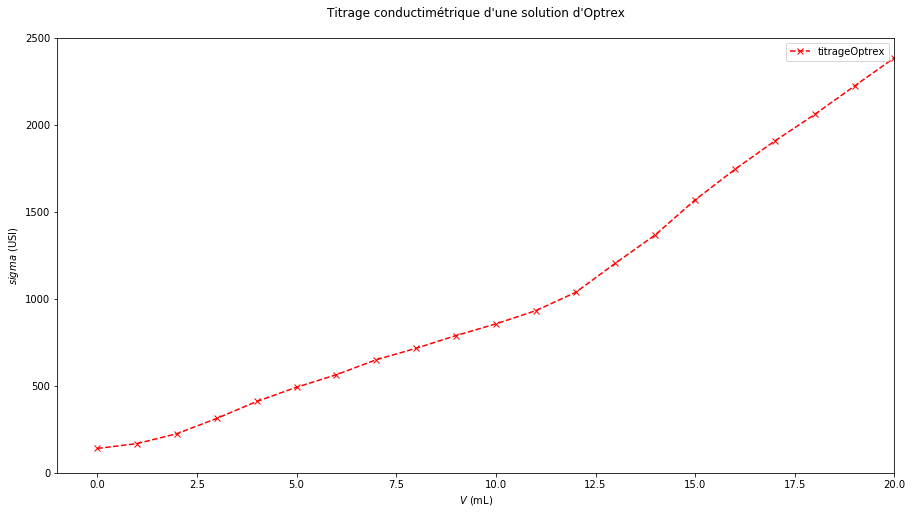

In [5]:
#Affichage de la fenêtre graphique

# On fixe une taille d'affichage et une zone de tracé
plt.figure(1, figsize=(15, 8))
plt.xlim(-1, 20)
plt.ylim(0,2500)

#tracer les positions
plt.plot(V,sigma,"rx--",label='titrageOptrex')
plt.legend(loc='upper right')

#étiquettes des axes
plt.xlabel(r'$ V $'+' (mL)')
plt.ylabel(r'$ sigma $'+' (USI)')

#Titre du graphique
plt.title("Titrage conductimétrique d'une solution d'Optrex\n",loc='center')

#Tracé du graphique
plt.show()

<div class = "alert alert-warning">  

**Partie 3 : Evolution des quantités de matière :**  
Cette fois-ci vous devez compléter :  
- Le début en donnant les valeurs initiales de l'expérience,  
- Ligne : ajouter les calculs à effectuer pour calculer les valeurs des quantités de matière des réactifs et des produits.
</div>

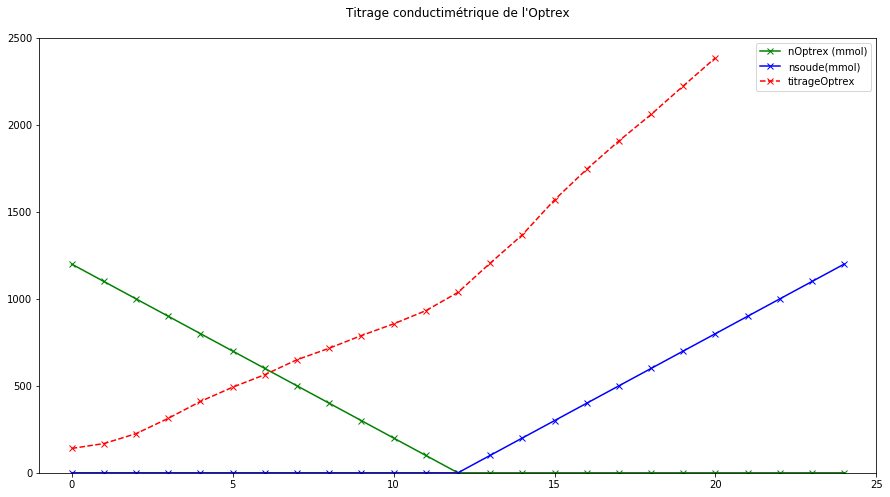

In [6]:
#Donnees expérimentales
Ve=12 #en mL
Cb=0.1 # en mol/L
Va=20 #en mL
Vmax=25 # Plus grand volume versé à la burette
# Tableau des valeurs successives des volumes versés
Vverse=[i for i in range(Vmax)]

#Calculs préliminaires :
Ca=Cb*Ve/Va
xmax=Cb*Ve

# Calculs des quantités de matières des espèces
na=[] # Quantité de titré (ici acide borique)
nb=[] # Quantité de titrant (ici ion hydroxyde)
# Avant l'équivalence
for i in range (Ve+1):
    na.append(1000*(Ca*Va-Cb*i))
    nb.append(0)
    
# Après l'équivalence
for i in range (Ve+1,Vmax):
    na.append(0)
    nb.append(1000*(Cb*(i-Ve)))

#tracer les positions
plt.figure(1, figsize=(15, 8))
plt.xlim(-1, 25)
plt.ylim(0,2500)
plt.plot(Vverse,na,"gx-",label='nOptrex (mmol)')
plt.plot(Vverse,nb,"bx-",label='nsoude(mmol)')
plt.legend(loc='upper right')
plt.plot(V,sigma,"rx--",label='titrageOptrex')
plt.legend(loc='upper right')



#Titre du graphique
plt.title("Titrage conductimétrique de l'Optrex\n",loc='center')

#Tracé du graphique
plt.show()